Payoff with capital of 100
Capital in option 1 100
Capital in option 2 0


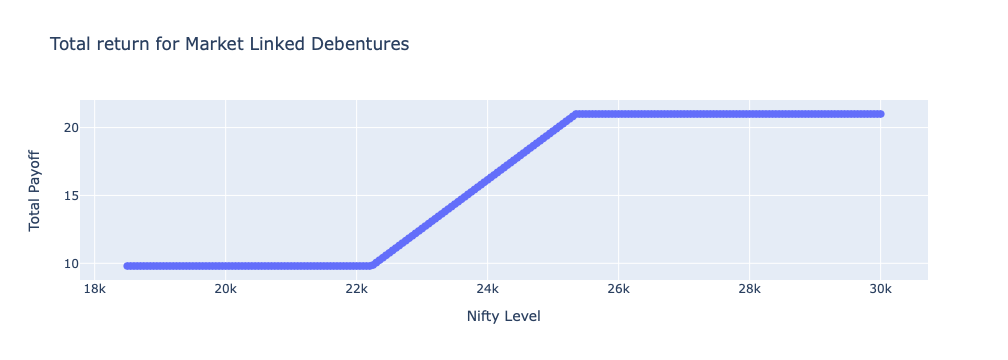

In [2]:
import numpy as np
# import matplotlib.pyplot as plt
import plotly.graph_objects as go

def option_1_payoff(nifty_final, capital_allotment_option_1):
    nifty_percentage_change = (nifty_final - 19500) / 19500 * 100
    
    if nifty_percentage_change > 30:
        return capital_allotment_option_1 * 0.3 * 0.7
    elif nifty_percentage_change >14 and nifty_percentage_change <= 30 :
        return capital_allotment_option_1 * 0.7 * nifty_percentage_change/100
    elif nifty_percentage_change >= 14:
        return capital_allotment_option_1 * 0.14 * 0.7
    else:
        return capital_allotment_option_1 * 0.14 * 0.7

def option_2_payoff(nifty_final, capital_allotment_option_2):
    nifty_percentage_change = (nifty_final - 19500) / 19500 * 100
    
    if nifty_percentage_change >= 0:
        return capital_allotment_option_2 * 0.25
    else:
        return 0

def generate_payoff_table(capital_allotment_option_1, capital_allotment_option_2):
    nifty_levels = np.arange(18500, 30001, 50)
    table = []
    
    for level in nifty_levels:
        option_1_payoff_amount = option_1_payoff(level, capital_allotment_option_1)
        option_2_payoff_amount = option_2_payoff(level, capital_allotment_option_2)
        total_payoff = option_1_payoff_amount + option_2_payoff_amount
        table.append([level, total_payoff])
    
    return table


def plot_payoff_graph(table):
    nifty_levels = [row[0] for row in table]
    total_payoff = [row[1] for row in table]
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=nifty_levels, y=total_payoff, mode='lines+markers', 
                             hovertemplate='<b>Nifty Level</b>: %{x}<br><b>Payoff</b>: %{y}',name=''))
    
    fig.update_layout(
        title='Total return for Market Linked Debentures',
        xaxis_title='Nifty Level',
        yaxis_title='Total Payoff',
    )
    
    fig.update_traces(marker=dict(size=8))
    fig.update_layout(showlegend=False)
    fig.show()

if __name__ == "__main__":
    capital_allotment_option_1 = 100
    capital_allotment_option_2 = 100-capital_allotment_option_1
    
    payoff_table = generate_payoff_table(capital_allotment_option_1, capital_allotment_option_2)
    # print("{:<10} {:<18}".format("Nifty", "Total Payoff"))
    # print("-" * 28)
    # for row in payoff_table:
    #     print("{:<10} {:<18}".format(row[0], row[1]))
    print("Payoff with capital of",capital_allotment_option_1+capital_allotment_option_2)
    print("Capital in option 1",capital_allotment_option_1)
    print("Capital in option 2",capital_allotment_option_2)
    plot_payoff_graph(payoff_table)
    
# if __name__ == "__main__":
#     capital_allotment_option_1 = 0
#     capital_allotment_option_2 = 1000000
    
#     payoff_table = generate_payoff_table(capital_allotment_option_1, capital_allotment_option_2)
#     # print("{:<10} {:<18}".format("Nifty", "Total Payoff"))
#     # print("-" * 28)
#     # for row in payoff_table:
#     #     print("{:<10} {:<18}".format(row[0], row[1]))
#     print("Payoff with capital of",capital_allotment_option_1+capital_allotment_option_2)
#     print("Capital in option 1",capital_allotment_option_1)
#     print("Capital in option 2",capital_allotment_option_2)
#     plot_payoff_graph(payoff_table)